In [10]:
import numpy as np 
from numpy import expand_dims
import matplotlib.pyplot as pt 
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential 
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from tensorflow.keras.datasets import cifar10

In [24]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

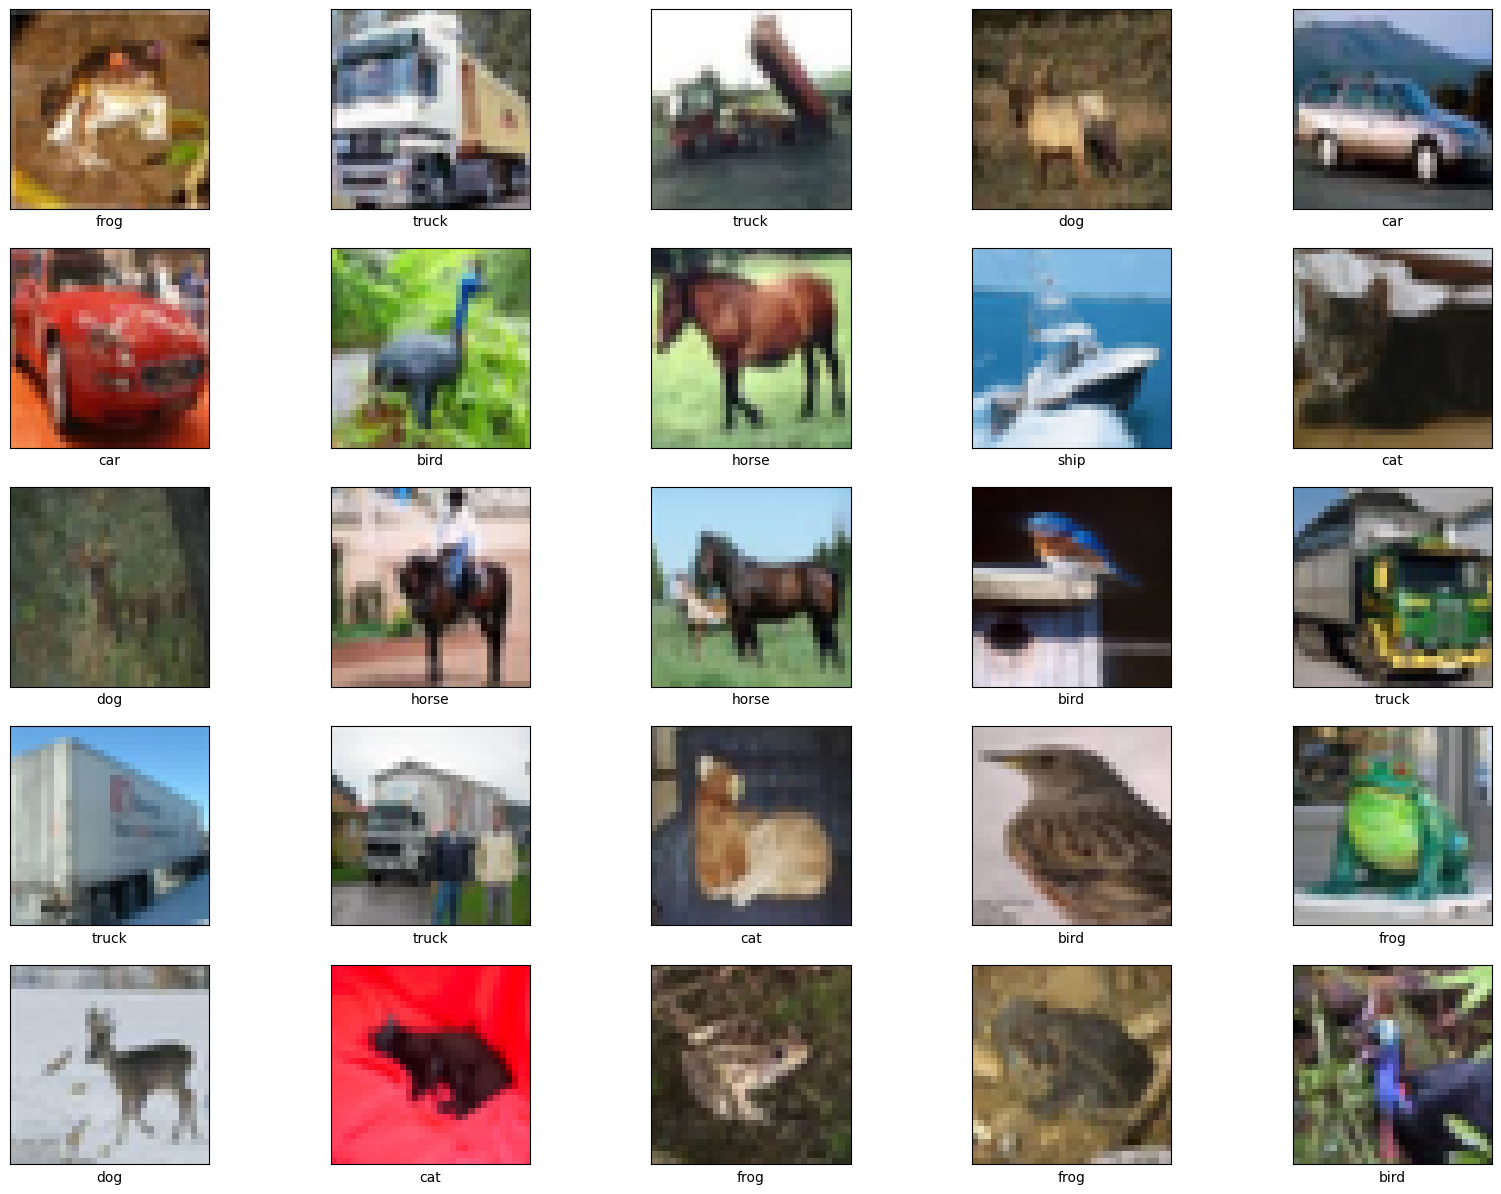

In [25]:
class_names = ['plane', 'car', 'bird', 'cat', 'dog', 'deer', 'frog', 'horse', 'ship', 'truck']

figure = pt.figure(figsize=(20,15))

for i in range(25):
    pt.subplot(5,5,i+1)
    pt.imshow(x_train[i])
    pt.xlabel(class_names[y_train[i][0]])
    pt.xticks([])
    pt.yticks([])

In [14]:
def buildGenerator():
    noise = layers.Input(shape=(100,))
    text = layers.Input(shape=(100,))
    combines = layers.Concatenate()([noise, text])

    model = Sequential()
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Conv2DTranspose(3,4, activation='tanh'))

    return model

In [15]:
generator = buildGenerator()
generator.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ ?                      │   0 (unbuilt) │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
def buildDiscriminator():
    image = layers.Input(shape=(100,))
    text = layers.Input(shape=(100,))
    combined = layers.Concatenate()([image, text])

    model = Sequential()
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

In [18]:
discriminator = buildDiscriminator()
discriminator.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
model = Sequential()

model.add(layers.Conv2D(32, (1,1),activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (1,1), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (1,1), activation='relu'))

model.add(layers.Flatten())

model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='Adam', loss=tf.keras.losses.SparseCategoricalCrossentropy, metrics=['accuracy'])

model.summary()


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 128)      │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 84)             │       688,212 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 699,622 (2.67 MB)

 Trainable params: 699,622 (2.67 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history = model.fit(x_train, y_train, epochs=5, verbose=1, validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.3501 - loss: 1.7944 - val_accuracy: 0.4937 - val_loss: 1.4016
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.5213 - loss: 1.3540 - val_accuracy: 0.5428 - val_loss: 1.2883
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.5594 - loss: 1.2506 - val_accuracy: 0.5321 - val_loss: 1.3025
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.5807 - loss: 1.1835 - val_accuracy: 0.5787 - val_loss: 1.1996
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.6009 - loss: 1.1371 - val_accuracy: 0.5746 - val_loss: 1.1995


Text(0.5, 1.0, 'Loss vs Epochs')

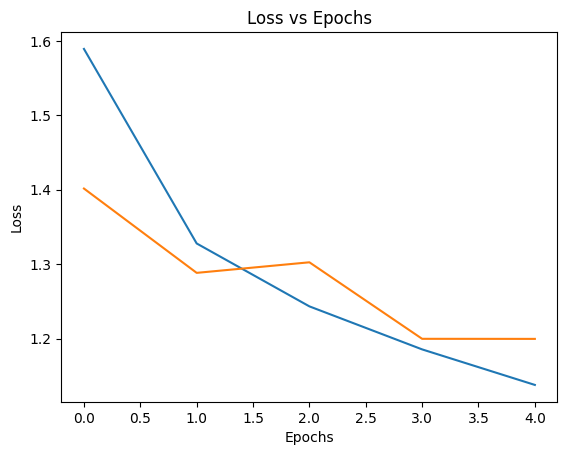

In [28]:
pt.plot(history.history['loss'], label='Training Loss')
pt.plot(history.history['val_loss'], label='Validation Loss')
pt.xlabel('Epochs')
pt.ylabel('Loss')
pt.title('Loss vs Epochs')

Text(0.5, 1.0, 'Accuracy vs Epochs')

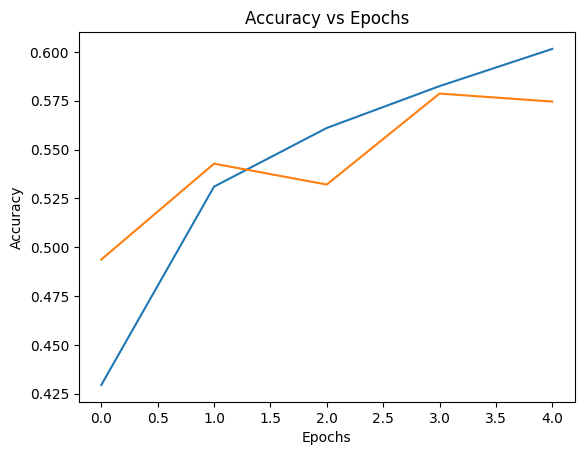

In [29]:
pt.plot(history.history['accuracy'], label='Training Accuracy')
pt.plot(history.history['val_accuracy'], label='Validation Accuracy')
pt.xlabel('Epochs')
pt.ylabel('Accuracy')
pt.title('Accuracy vs Epochs')

In [31]:
loss, acc = model.evaluate(x_test,y_test)
loss, acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5742 - loss: 1.2018


(1.1995198726654053, 0.5745999813079834)

In [38]:
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [53]:
text = y_test[3]
image_gen = x_test[3]

In [49]:
class_names[text[0]]

'plane'

In [54]:
image = expand_dims(x_test[3], axis=0)
image = model.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


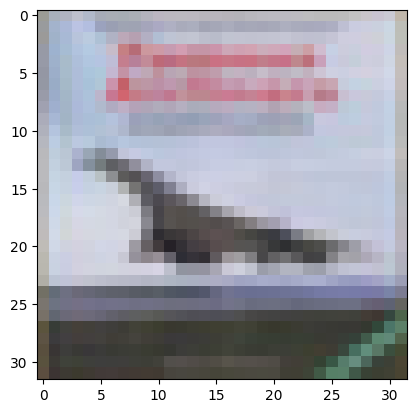

In [55]:
pt.imshow(image_gen)